## Binäre Klassifikation - Entscheidungsbaum
Binäre Klassifikation ist eine oftmals wiederkehrende Aufgabe.

Beispiele hierfür:
- Ist in einem Bild ein Hund zu sehen oder nicht.
- Ist eine Person kreditwürdig oder nicht.
- Trennung bei physikalischen Experimenten zwischen Signal (*signal*) und Untergrund (*background*)
- Ist ein Planet potenziell bewohnbar (*habitable*) oder nicht.

Die letzte Fragestellung wird hier etwas untersucht, so wie es auch bei Viviana Acquaviva [Acq2023] durchgeführt wird.
Dazu werden zuerst die Daten, die für die Untersuchung herangezogen werden betrachtet, um mit den Daten vertrauter zu werden.
Anschließend wird der Algorithmen **Entscheidungsbaum** (*Decision Tree*, DT) vorgestelt.

In [1]:
# --- imports
import numpy as np
import matplotlib.pyplot as plt 

### 1 Problemstellung und Daten

Daten sind die Basis für die Arbeit im Data Science. Viviana Acquavia schreibt dazu (siehe [Acq2023], Abschnitt 2.1) als von ihr aufgestellte *goldene Regel*: "know your data"!
Daher ist es wichtig, die Daten zu betrachten. Dabei sollen mindestens die nachfolgenden Dinge unternommen werden:
- Den Umfang der Daten prüfen, die Anzahl der Instanzen und die Anzahl der Eigenschaften. Gibt es ausreichend viele Datensätze für die Bearbeitung?
- Überprüfen, ob die Daten vollständig sind oder ob es in den Datensätzen fehlende Daten gibt. Wie wird mit fehlenden Daten umgegangen?
- Müssen die Daten eventuell normalisiert werden? Gibt es merkwürdige Verteilungen der Daten? Wie wird mit Ausreißern (*outlier*) der Daten umgegangen?
- Sind bei einem Klassifizierungsproblem in allen Klassen ausreichend viele Daten vorhanden? 

Daher ist es nicht ratsam, die Algorithmene einfach nur anzuwenden, ohne dass die Daten verstanden werden. 
Die Ergebnisse der Analyse müssen geprüft und interpretiert werden. 
Es ist zu prüfen, ob das Ergebnis mit der Intuition übereinstimmt. Wenn nicht, dann ist zu klären, woher die Diskrepanz herrührt.

### Habitable Planeten

Vivana Acuavia wählt als ersten Beispiel einen Datensatz von 18 Planeten, bei denen verschiedene Merkmale bekannt sind.
Es ergibt sich die Frage, ob sie bewohnbar (*habitable*) sind oder nicht. 
Die Daten hat sie von der Quelle https://phl.upr.edu/hwc, in der inzwischen einige Tausende Planeten aufgeführt sind. 
Sie hat 18 Planeten aus dieser Liste ausgewählt. Diese Beispiele werden auch im Nachfolgenden betrachtet und untersucht. 
Dabei werden verschiedene 
Modelle angewendet und dabei verschiedene Sachverhalte erläutert und beispielhaft demonstriert.

Die Beispieldaten beinhalten die folgenden Merkmale (*feature*) und Ziele (*target*):
- `P_NAME`: Name des Exoplanten: Dies ist nur für die Identifikation notwendig.
- `S_MASS`: Masse des Elternsterns (*stellar mass*), um den der Planet kreist, ausgedrückt in Sonnenmassen.
- `P_PERIOD`: Umlaufdauer (*orbital period*) des Planeten um den Elternstern in Tagen. 
- `P_DISTANCE`: Distanz (distance) des Planeten von Stern in Astronomischen Einheiten (AU).
- `P_HABITABLE`: Bewohnbar (*habitable*)? Eine Einschätzung, ob der Planet bewohnbar ist (1 = bewohnbar, 0 = nicht bewohnbar).

Hinweis: In der Quelle der Daten ist die Eigenschaft bewohnbar noch weiter differenziert. Darauf wird hier nicht genauer eingegangen. 
Wenn mit dem großen Datensatz aus der Quelle gearbeitet wird, dann ist zu klären, wie damit umgegangen wird. 
Daher ist es wichtig, die Daten zu kennen und vor der Auswertung zu betrachten.

In [2]:
# --- read the data
import pandas as pd
filename = 'HabitablePlanets_LearningSet.csv'
df_learning_set = pd.read_csv (filename, sep=',')
df_learning_set \
    = df_learning_set.drop (df_learning_set.columns [0], axis=1) 
print (df_learning_set)
learning_set \
    = df_learning_set.drop (df_learning_set.columns [0], axis=1).to_numpy ()

                P_NAME  S_MASS     P_PERIOD  P_DISTANCE  P_HABITABLE
0         Kepler-736 b    0.86     3.601472    0.043718            0
1         Kepler-636 b    0.85    16.080661    0.118082            0
2         Kepler-887 c    1.19     7.638460    0.080420            0
3         Kepler-442 b    0.61   112.305300    0.409327            1
4         Kepler-772 b    0.98    12.992073    0.107408            0
5   Teegarden's Star b    0.09     4.910000    0.025200            1
6             K2-116 b    0.69     4.655411    0.048086            0
7            GJ 1061 c    0.12     6.689000    0.035000            1
8           HD 68402 b    1.12  1103.000000    2.180981            0
9        Kepler-1544 b    0.81   168.811170    0.557107            1
10        Kepler-296 e    0.50    34.142110    0.178202            1
11        Kepler-705 b    0.53    56.056054    0.231926            1
12        Kepler-445 c    0.18     4.871229    0.031746            0
13         HD 104067 b    0.62    

Die Daten stehen nun als `numpy`-Array zur Verfügung.
Es ist ein $18 \times 4$-Array mit numerischen Werten.
Die Namen der Sterne sind nicht mehr in den Daten enthalten.

Bei der Betrachtung der Daten fällt auf, dass der Plant mit der Nummer 8 (HD 68402 b) ein Ausreißer ist.
Die Periodendauer und der Abstand zum Elternstern ist deutlicher größer als bei den anderen Planent.
In Anbetracht der Kepler'schen Planentengesetz ist das jedoch nicht unwahrscheinlich.

Es gibt bei den Beispielen acht bewohnbare Planeten und zehn unbewohnbare Planeten. 
Damit ist der Datensatz bezüglich der Eigenschaft bewohnbar ausgeglichen.
Im großen Datensatz ist der Anteil der bewohnbaren Planeten deutlich geringer.

Eine wichtige Eigenschaft für die Frage, ob ein Planet bewohnbar ist oder nicht, ist die Temperatur auf der Oberfläche.
Diese Eigenschaft ist nicht im Datensatz direkt enthalten. 
Über die Eigenschaften Sternenmasse und Distanz ist die Temperatur jedoch indirekt berücksichtigt, 
denn Sternenmasse und Distanz sind wichtige Parameter, welche die Temperatur stark beeinflussen.

### 2 Aufspaltung in Trainings- und Testdaten

Gemäß den Ausführungen bei Viviana Acquaviva werden zuerst die ersten 13 Planeten (also die Nummern 0 bis 12) als Trainingsdaten (*training set*) 
und die letzten fünf Planeten (Nummern 13 bis 17) als Testdaten (*test set*) verwendet. 
Später wird die Aufteilung verändert.

Die Daten haben drei Input-Daten.
- 1. Spalte: Masse des Elternsterns in Sonnenmassen (`S_MASS`), 
- 2. Spalte: Dauer eines Umlaufes in Tagen (`P_PERIOD`) und 
- 3. Spalte: Entfernung des Planeten vom Elternstern in Astronomischen Einheiten (AU) (`P_DISTANCE`).

und eine Output-Spalte
- 4. Spalte: Kennzeichen ob habitable (1) oder nicht (0).

Da eine 3-dimensionale Darstellung schwierig ist, werden im nachfolgenden nur zwei der Eigenschaften zur grafischen Darstellung und zur Bearbeitung verwendet: 
Sternenmasse (`S_MASS`) und Umlaufdauer (`P_PERIOD`).

In [3]:
# --- split into training set / test set
# - select columns for training
pattern_2D = [True, True, False, True] 

training_set = learning_set [:13, pattern_2D]
test_set = learning_set [13:, pattern_2D]

# --- split in features and label
X_train = training_set [:, :2]
X_test = test_set [:, :2]
# - convert y_train, y_test to a column vector
y_train = training_set [:, 2].reshape (-1, 1)
y_test = test_set [:, 2].reshape (-1, 1)

Die Daten werden grafisch dargestellt. Da die Werte auf der $y$-Achse sehr weit gestreut sind, wird eine logarithmische Skalierung gewählt.

Es sind zwei Linien eingezeichnet, die später genauer erläutert werden.

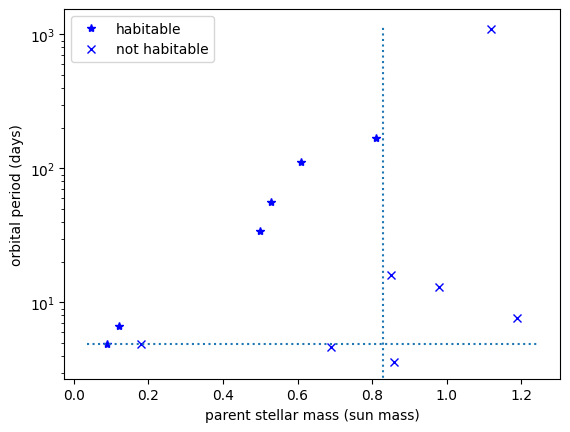

In [4]:
# --- select habitable / not habitable
pattern_train_habitable \
    = np.where (y_train == 1, True, False).transpose () [0]
pattern_train_not_habitable \
    = np.where (y_train == 0, True, False).transpose () [0]

X_train_habitable = X_train [pattern_train_habitable]
X_train_not_habitable = X_train [pattern_train_not_habitable]
y_train_habitable = y_train [pattern_train_habitable]
y_train_not_habitable = y_train [pattern_train_not_habitable]

plt.plot (X_train_habitable [:,0], X_train_habitable [:,1], \
          'b*', label = 'habitable')
plt.plot (X_train_not_habitable [:,0], X_train_not_habitable [:,1], \
          'bx', label = 'not habitable')
xmin, xmax = plt.xlim ()
plt.hlines (4.93, xmin, xmax,linestyles = 'dotted')
ymin, ymax = plt.ylim ()
plt.vlines (0.83, ymin, ymax,linestyles = 'dotted')
plt.xlabel ('parent stellar mass (sun mass)')
plt.ylabel ('orbital period (days)')
plt.yscale ("log")
plt.legend ()
plt.show ()

### 3 Algorithmus: Entscheidungsbaum (*Decision Tree*, DT) - per Hand
Bei einem Entscheidungsbaum werden an Hand eines Kriteriums Schnitte durchgeführt. Dadurch wird der Bereich in zwei Teile zerlegt.
Es ergibt sich die Frage, wo der Schnitt geeignet gewählt werden kann. Ziel ist es, dass am Schluss reine Bereiche entstehen,
bei der in jedem Bereich nur eine Klasse vertreten ist. In den einzelnen Bereichen soll es am Ende keine Vermischung geben.

Zur Bemessung der Vermischung von Daten wird oftmals der **Gini Unreinheit** (*Gini impurity*) herangezogen.

Der Wert *Gini Unreinheit* ist nach dem italienischen Statistiker Corrado Gini (https://de.wikipedia.org/wiki/Corrado_Gini) benannt.
Der Wert darf nicht mit dem Gini-Koeffizienten verwechselt werden!

Die Gini Unreiheit (hier kurz Gini) wird für jeden Bereich folgendermaßen berechnet.
Für jede Klasse $i$ sei $n(i)$ die Anzahl der Elemente der Klasse im Bereich. 
Somit ist $N = \sum_i n(i)$ die Gesamtanzahl der Objekte im Bereich.
Dann sei $f(i) = n(i) / N$ der Anteil der Elemente der Klasse $i$ in der Gesamtmenge.
Die Gini Unreinheit ist dann gegeben durch
$$ Gini = 1 - \sum_i f(i)^2 $$
In einer Menge mit zwei Klassen ist der Wert zwischen $0.0$ und $0.5$. Bei einem Wert von $0.0$ besteht die Menge nur aus Elementen einer Klasse.
Bei einem Wert von $0.5$ ist die Menge maximal durchmischt

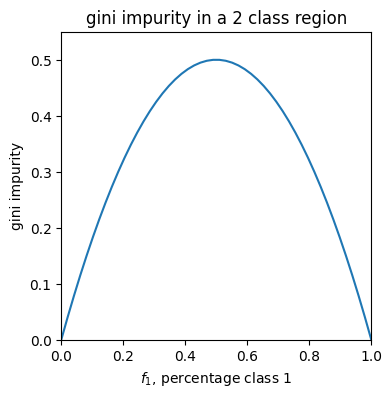

In [5]:
# --- plot gini for a 2-class-example
f1 = np.linspace (0.0, 1.0, 50)
f2 = 1.0 - f1
gini = 1 - f1 **2 - f2 **2
plt.figure (figsize=(4,4)) 
plt.plot (f1, gini)
plt.xlim ([0.0, 1.0])
plt.xlabel ("$f_1$, percentage class 1")
plt.ylim ([0.0, 0.55])
plt.ylabel ("gini impurity")
plt.title ("gini impurity in a 2 class region")
plt.show ()


In den Trainingsdaten sind insgesamt 13 Daten enthalten. Sieben habitable Planeten und sechs nicht habitable Planeten. 
Für die gegebene Trainingsmenge ist $Gini = 1 - (7/13)^2 - (6/13)^2 = 0.497$

Wenn die Trainingsdaten betrachtet werden, dann gibt es zwei Schnitte, welche die Menge so spalten, so dass ein Teilbereich
rein ist. 
- ist die Sternenmasse größer als $0.83$ (Sonnenmassen), dann sind alle Planenten nicht habitabel
- ist die Periodendauer kleiner als $4.93$ (Tage), dann sind alle Planenten nicht habitabel

Beide Linien sind in der obigen Zeichnung eingetragen. Welcher Schnitt sollte zuerst durchgeführt werden?

In [6]:
# --- calculate gini impurity for 2 classes
def gini (n1, n2):
    n = n1 + n2
    return 1 - (n1 / n) **2 - (n2 / n) ** 2

# --- some examples
print (gini (2,0))
print (gini (1,1))
print (gini (7, 6))
print (gini (6, 4))
print (gini (6, 2))

0.0
0.5
0.49704142011834324
0.48
0.375


Wird der Schnitt bezüglich der Periodendauer durchgeführt. Dann ist sind im oberen Bereich 6 habitable und 4 nicht-habitable Planeten.
Im unteren Bereich sind 0 habitable und 3 nicht-habitable Planten. Der untere Bereich ist damit rein. Damit ergibt sich folgender gewichtete Wert:

In [7]:
gini_slice_period = (10 / 13) * gini (6, 4) + (3 / 13) * gini (0, 3)
print (gini_slice_period)

0.36923076923076925


Wird der Schnitt bezüglich der Sternenmasse durchgeführt. Dann ist sind im linken Bereich 6 habitable und 2 nicht-habitable Planeten.
Im rechten Bereich sind 0 habitable und 5 nicht-habitable Planten. Der rechte Bereich ist damit rein. Damit ergibt sich folgender gewichtete Wert:

In [8]:
gini_slice_mass = (8 / 13) * gini (6, 2) + (5 / 13) * gini (0, 5)
print (gini_slice_mass)

0.23076923076923078


Damit zeigt sich, dass der Schnitt nach der Sternenmasse die Gini Unreinheit deutlicher reduziert als der Schnitt nach der Periodendauer.
Daher wird zuerst der Schnitt nach der Sternenmasse durchgeführt. Dann ist eine Teilmenge rein, die andere noch nicht.
Wenn bei der unreinen Menge dann der Schnitt nach der Periodendauer durchgeführt wird, dann ist die gesamte Trainingsmenge
in drei reine Bereiche aufgeteilt. Eine weitere Zerlegung ist nicht notwendig.

Aber was bedeutet das nur für die Testdaten? Passen diese auch zu dieser Aufteilung?

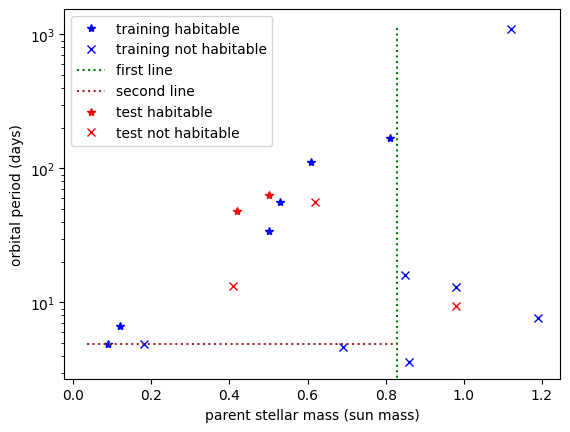

In [9]:
pattern_test_habitable \
    = np.where (y_test == 1, True, False).transpose () [0]
pattern_test_not_habitable \
    = np.where (y_test == 0, True, False).transpose () [0]
X_test_habitable = X_test [pattern_test_habitable]
X_test_not_habitable = X_test [pattern_test_not_habitable]

plt.plot (X_train_habitable [:,0], X_train_habitable [:,1], \
          'b*', label = 'training habitable')
plt.plot (X_train_not_habitable [:,0], X_train_not_habitable [:,1], \
          'bx', label = 'training not habitable')
ymin, ymax = plt.ylim ()
plt.vlines (0.83, ymin, ymax, color = 'green', \
            linestyles = 'dotted', label = 'first line')
xmin, xmax = plt.xlim ()
plt.hlines (4.93, xmin, 0.83, color = 'brown', \
            linestyles = 'dotted', label = 'second line')
plt.plot (X_test_habitable [:,0], X_test_habitable [:,1], \
          'r*', label = 'test habitable')
plt.plot (X_test_not_habitable [:,0], X_test_not_habitable [:,1], \
          'rx', label = 'test not habitable')
plt.xlabel ('parent stellar mass (sun mass)')
plt.ylabel ('orbital period (days)')
plt.yscale ("log")
plt.legend ()
plt.show ()

Von den fünf Testdaten  sind drei richtig klassifiziert, zwei jedoch nicht!

### 4 Decision Tree (DT) mit *scikit-learn*

Die Berechnung per Hand kann sehr schnell aufwändig werden. Zudem ist die Dimension der Daten nicht nur 2. 
Bereits im obigen Beispiel wurde eine Dimension reduziert, damit die Daten grafisch anschaulich dargestellt werden können.
Das Paket *sklearn* (*scikit-learn*) bietet jedoch ein entsprechendes Modell.

Hinweis: Es werden einige zufällige Permutation bei jedem Splitt durchgeführt. Daher wird die Ergebnisse je nach Durchführung variieren.
Daher für den Zufallsgenerator einen *seed* definieren.

In [10]:
# --- import 
from sklearn.tree import DecisionTreeClassifier

# --- redefine the training set und test set, use all three features
training_set = learning_set [:13,:]
test_set = learning_set [13:,:]

# --- split in features and label
X_train = training_set [:, :3]
y_train = training_set [:, 3]
X_test = test_set [:, :3]
y_test = test_set [:, 3]

# --- define the model and some parameters
DT_model = DecisionTreeClassifier(random_state = 2024) 
DT_model

DecisionTreeClassifier(random_state=2024)

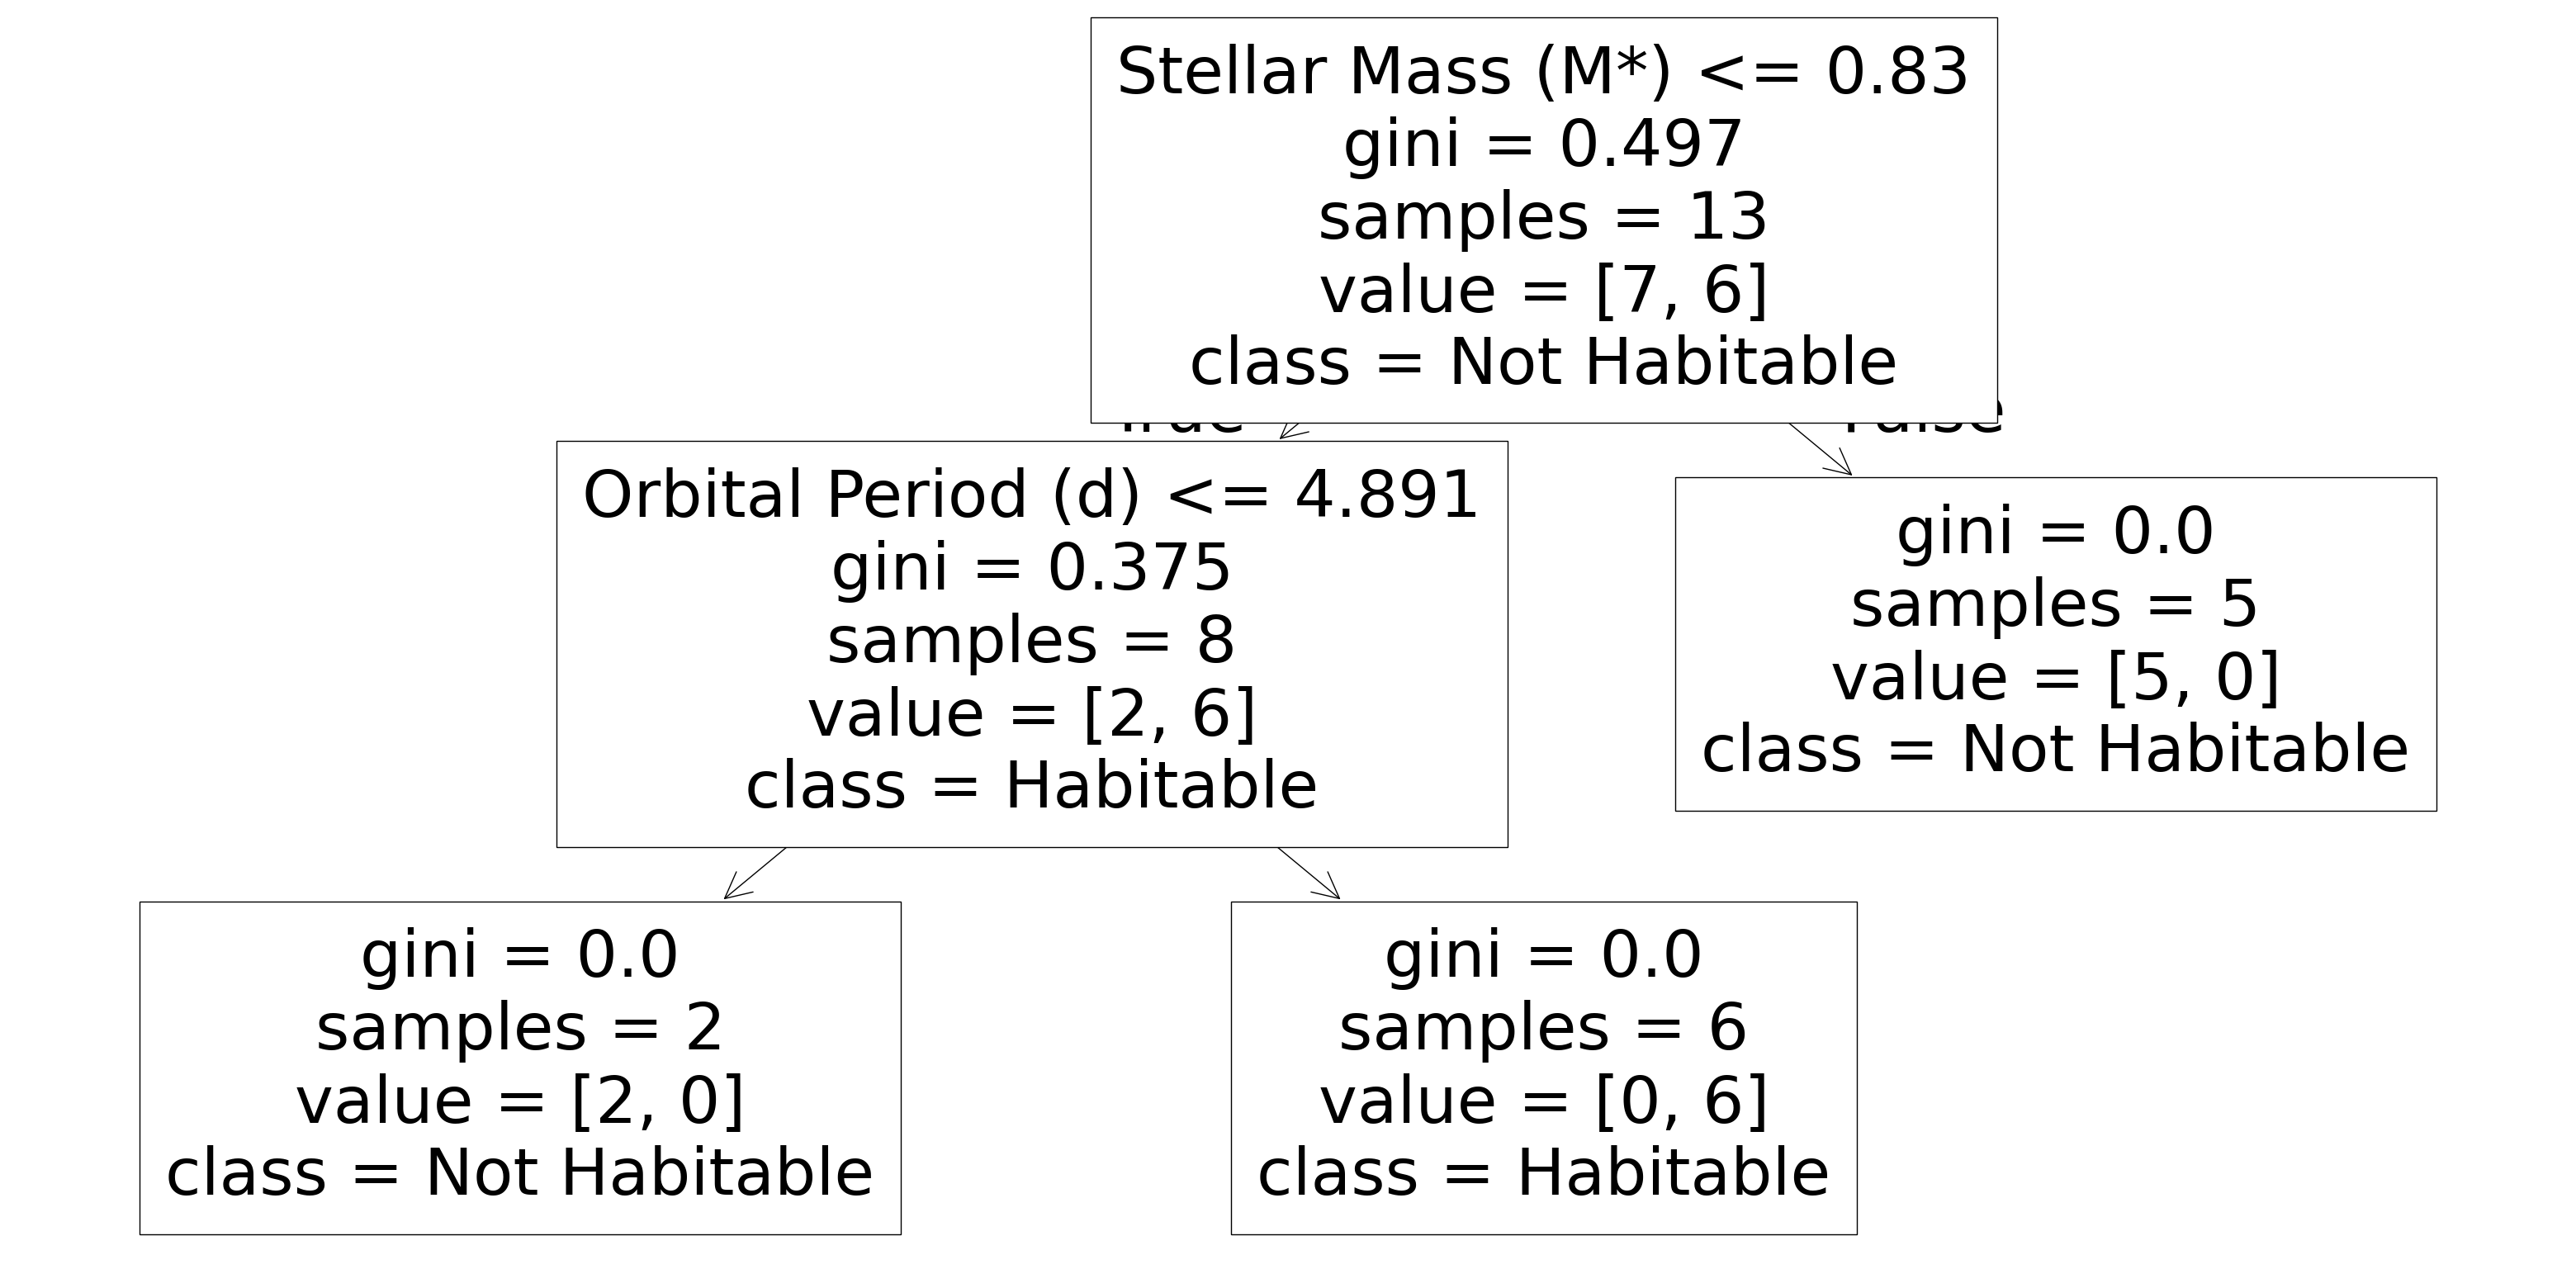

In [11]:
# --- train the model
DT_model.fit (X_train, y_train) 

# --- visualize decision tree
from sklearn import tree
# - customize according to the size of the tree
plt.figure (figsize=(40,20))  
tree.plot_tree (DT_model, feature_names = ['Stellar Mass (M*)', \
    'Orbital Period (d)', 'Distance (AU)'], \
    class_names = ['Not Habitable','Habitable'])
plt.show()

Es ist ein sehr kleiner, kompakter Entscheidungsbaum. Mit nur zwei Entscheidungen wurde die Trainingsmenge in reine Bereiche aufgeteilt.
Die dritte Eigenschaft (`P_DISTANCE`) ist für die Entscheidungsfindung nicht verwendet worden.
Diese Eigenschaft ist somit hier unbedeutend.

Welches Ergebnis ergibt sich für die Testmenge? 
Auf jeden Fall ist gemäß diesem Entscheidungsbaum die Erde voraussichtlich nicht bewohnbar!

In [12]:
# --- predict
y_pred = DT_model.predict (X_test)
y_diff = np.absolute (y_pred - y_test)

n_planets = y_diff.size
n_correct = n_planets - np.count_nonzero (y_diff)
print (f" {n_correct} of {n_planets} are correctly predicted, " + \
       f"{n_correct * 100.0 / n_planets:5.1f} %")

 3 of 5 are correctly predicted,  60.0 %


### 5 Abhängigkeit von der Trainingsmenge
Das gegebene Beispiel ist sehr klein. Die Lernmenge umfasst nur 18 Elemente. Davon wurden (die ersten) 13 Elemente als Trainingsmenge ausgewählt.
Jetzt werden die letzten 13 Elemente als Trainingsmenge ausgewählt.  Wie verändert sich dadurch der Entscheidungsbaum.

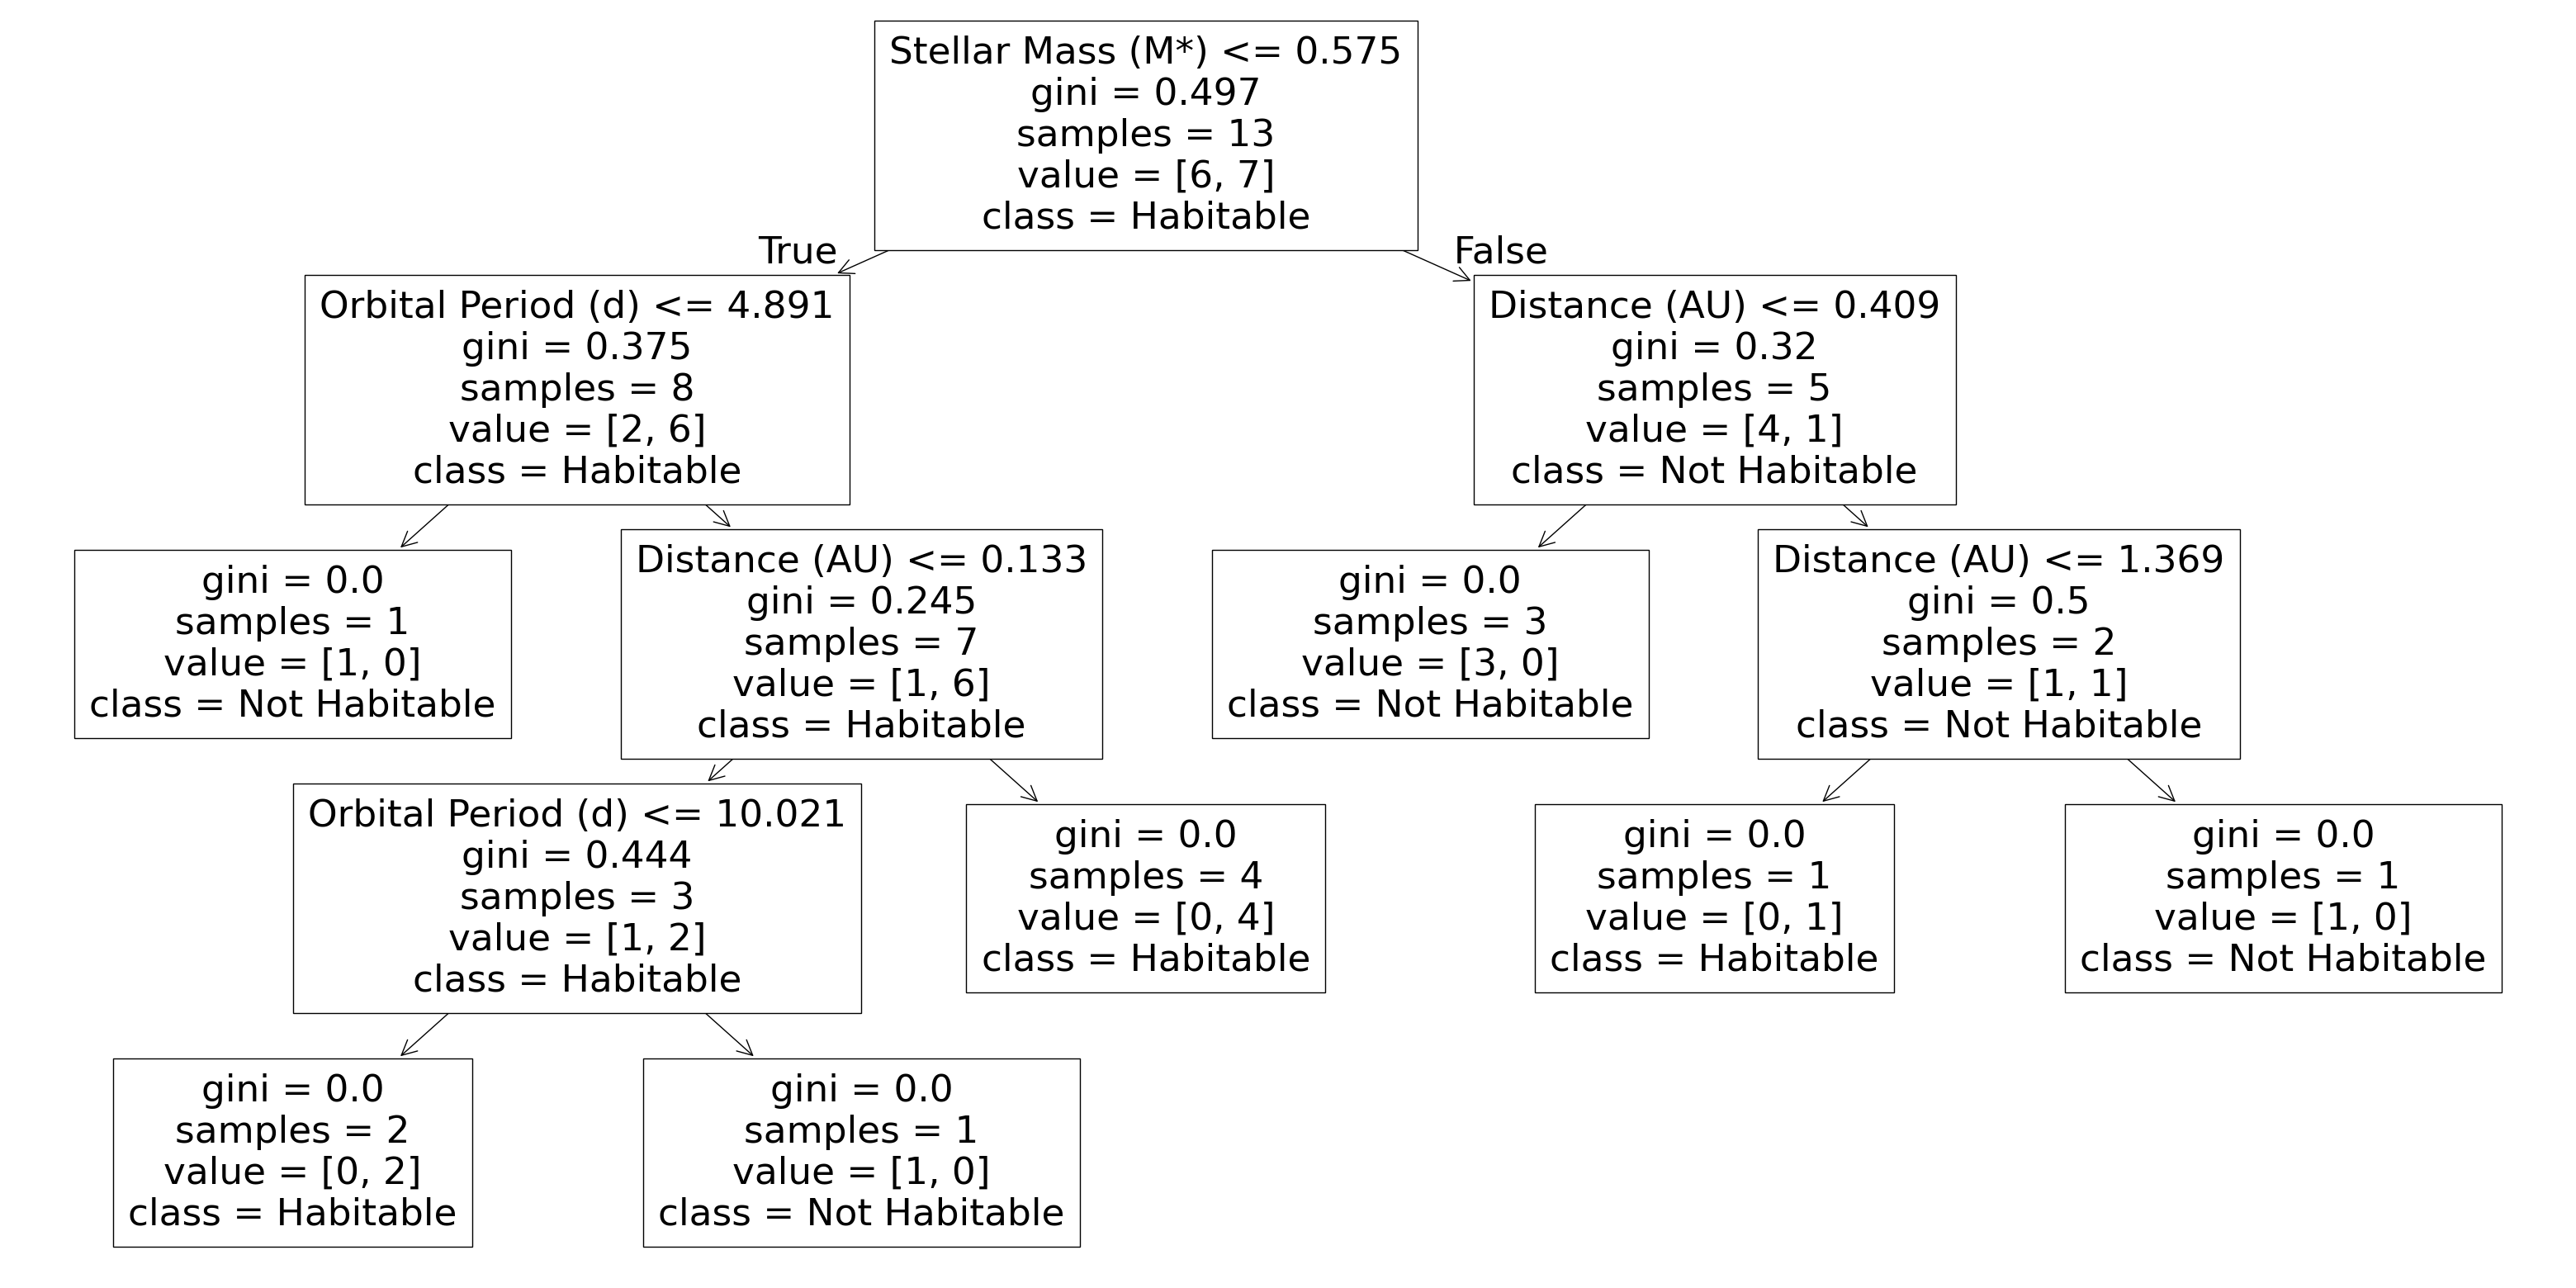

In [13]:
# --- define training set and test set
training_set2 = learning_set [5:,:]
test_set2 = learning_set [:5,:]

# --- split in features and label
X_train2 = training_set2 [:, :3]
y_train2 = training_set2 [:, 3] 
X_test2 = test_set2 [:, :3]
y_test2 = test_set2 [:, 3] 

# --- train the model
DT2_model = DecisionTreeClassifier(random_state = 2024)
DT2_model.fit (X_train2, y_train2) 

# --- visualize decision tree
from sklearn import tree
plt.figure (figsize=(40,20))
tree.plot_tree (DT2_model, feature_names = ['Stellar Mass (M*)', \
    'Orbital Period (d)', 'Distance (AU)'], \
    class_names = ['Not Habitable','Habitable'])
plt.show()

Der Entscheidungsbaum sieht komplett anders aus. Er ist tiefer und hat somit mehr Entscheidungen.
Hier sind alle drei Eigenschaften im Entscheidungsbaum enthalten.
Welches Ergebnis ergibt sich für die Testmenge?
Auf jeden Fall ist gemäß diesem Entscheidungsbaum die Erde voraussichtlich bewohnbar!

In [14]:
# --- predict
y_pred2 = DT2_model.predict(X_test2)
y_diff2 = np.absolute (y_pred2 - y_test2)
n_planets2 = y_diff2.size
n_correct2 = n_planets2 - np.count_nonzero (y_diff2)
print (f" {n_correct2} of {n_planets2} are correctly predicted, " \
       + f"{n_correct2 * 100.0 / n_planets2:5.1f} %")

 5 of 5 are correctly predicted, 100.0 %


Es ergibt sich hier eine 100%-tige Korrektheit. 
Doch ist damit dieser Entscheidungsbaum besser?
Das kann hier nicht einfach gesagt werden. Die Trainings- und Testmenge ist sehr klein. 
Daher kann als wichtige Aussage mitgenommen werden: **die unterschiedliche Aufteilung in Traingsmenge und Testmenge, 
kann einen entscheidenen Einfluss auf das Modell und auf den Testfehler haben**.

DIe Bewertung von Modellen muss genauer betrachtet werden.
Die (einheitliche) Bewertung ist wichtig, um dann verschiedene Modelle miteinander vergleichen zu können.

### 6 Variation des Modells: maximale Tiefe 2
Das Modell hat einige Parameter, die eingestellt werden können. 
Zwei Parameter (*criterion* und *splitter*) sind mit den Standardwerten definiert.
Daher sind diese Parameter oben nicht aufgetaucht. 
Weitere Möglichkeiten können in der Dokumentation für das Modell nachgesehen werden.
Ein dritter Parameter (*max_depth*) gibt an, bis zu welcher Tiefe der Entscheidungsbaum gebildet werden soll.
Im Nachfolgenden wird ein Entscheidungsbaum mit einer maximalen Tiefe von 2 erstellt und angewendet.

Als Trainings- und Testdaten wird die selebe Aufteilung wie beim zweiten Modell verwendet


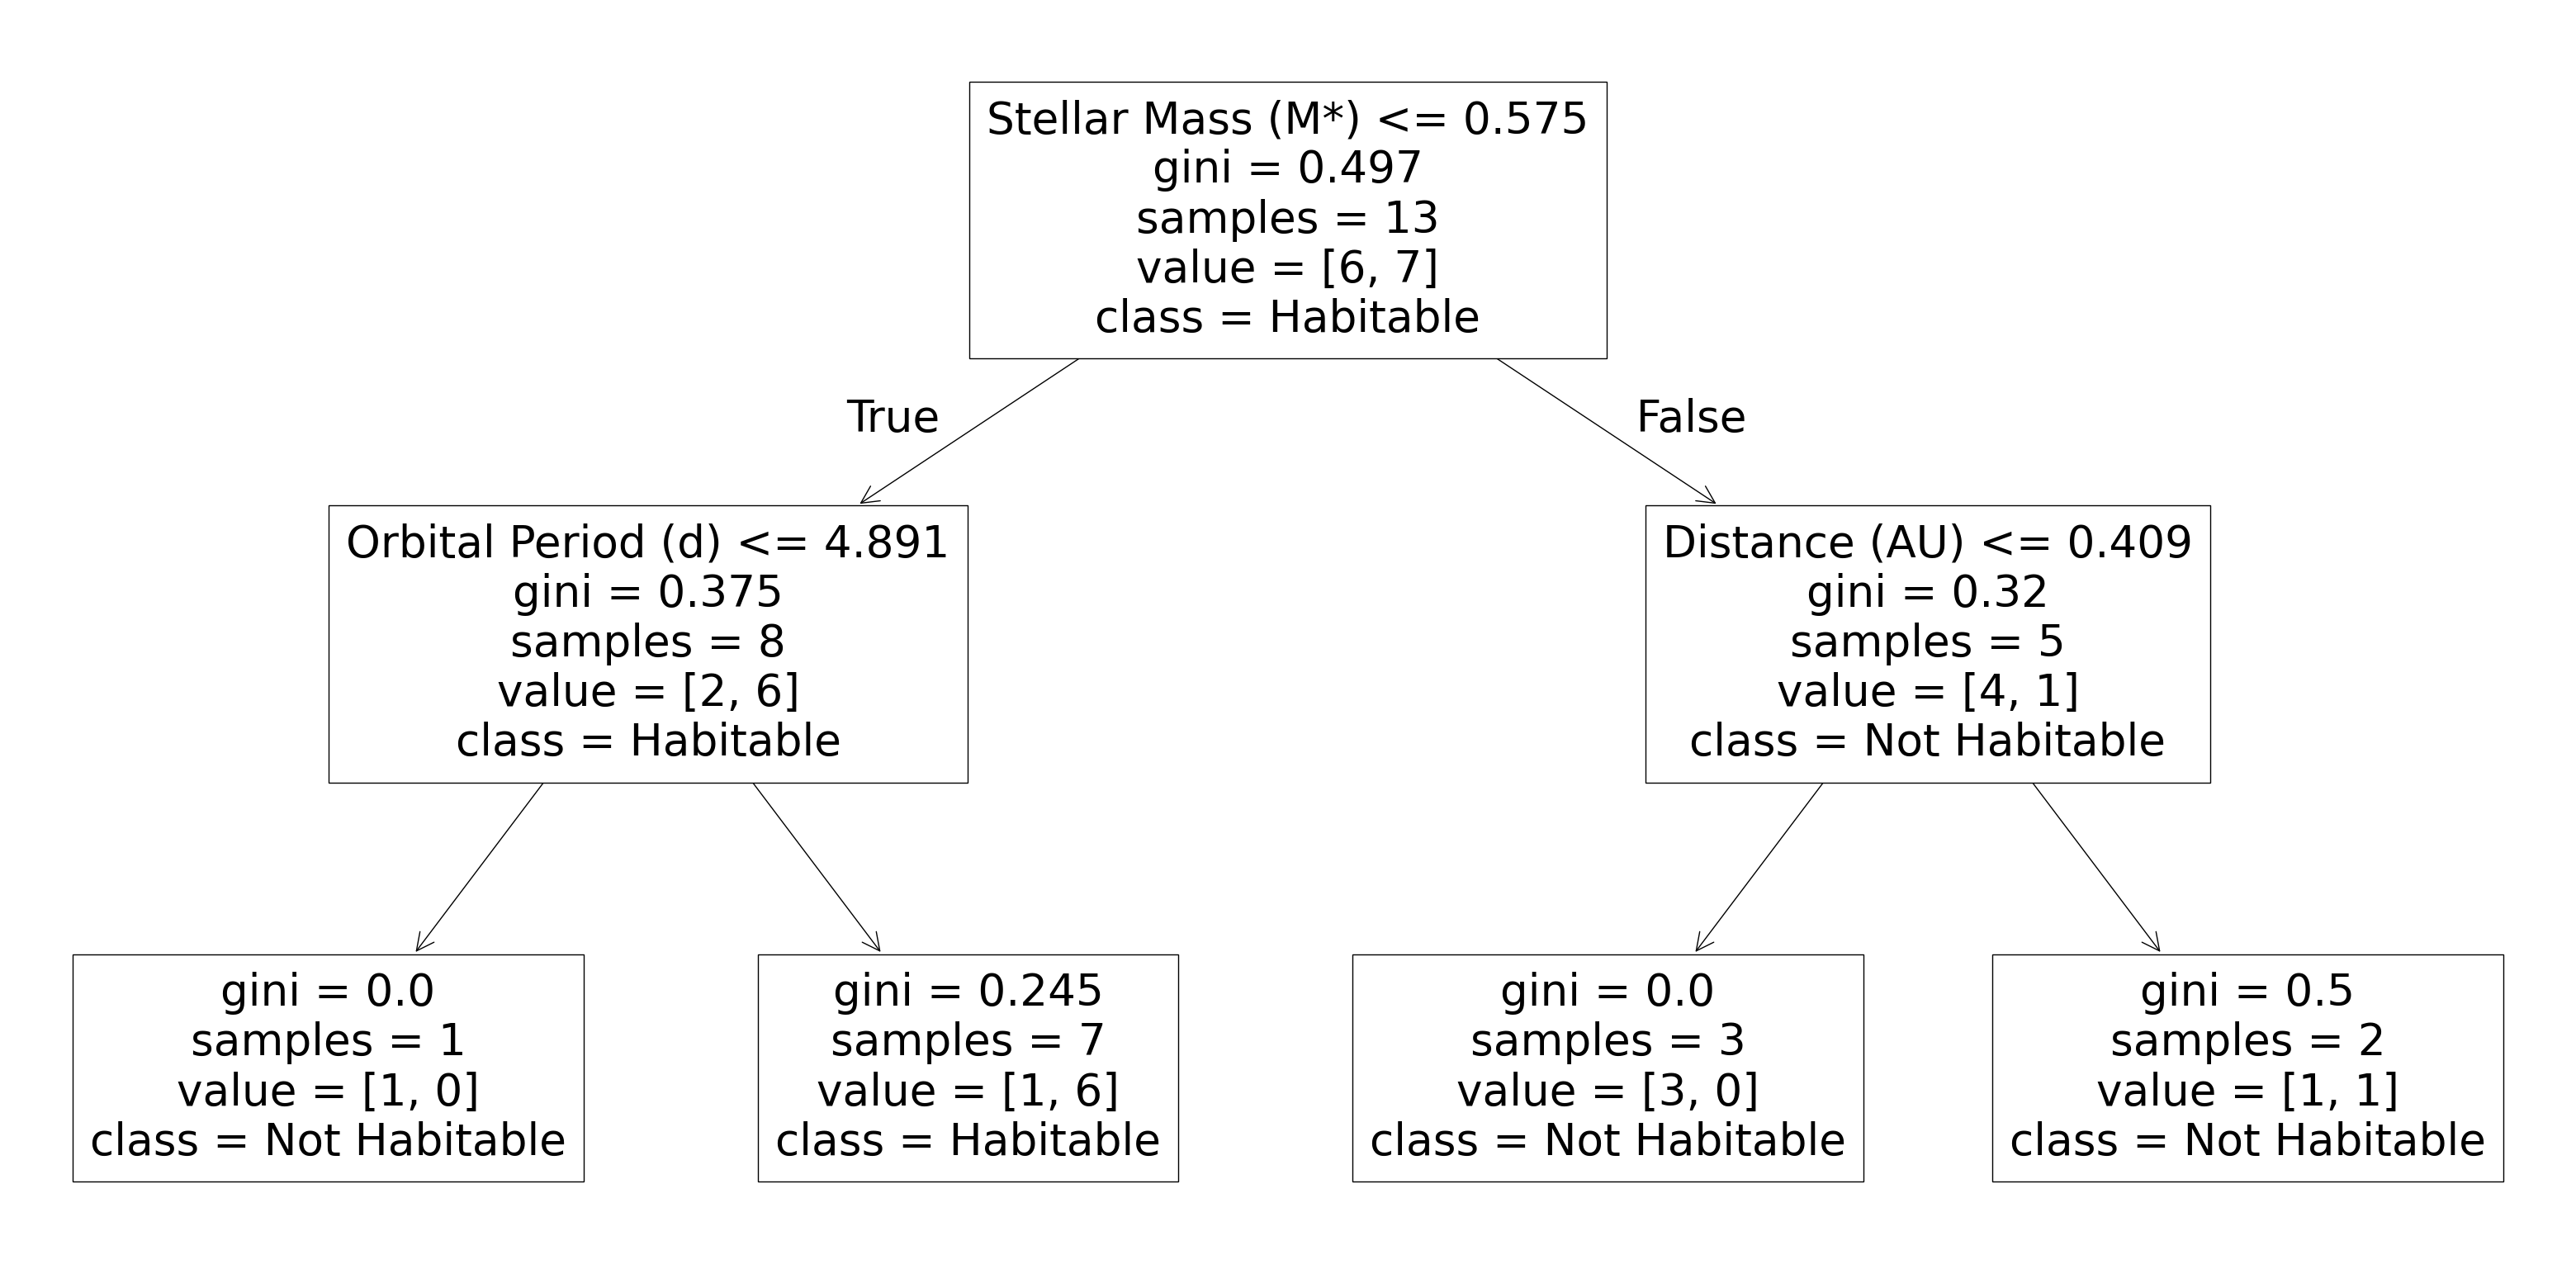

 4 of 5 are correctly predicted,  80.0 %


In [15]:
# --- define the model and some parameters
DT3_model = DecisionTreeClassifier(criterion='gini', splitter='best', \
                                   max_depth = 2, random_state = 2024)

# --- train the model
DT3_model.fit (X_train2, y_train2) 

# --- visualize decision tree
plt.figure (figsize=(40,20))  
tree.plot_tree (DT3_model, feature_names = ['Stellar Mass (M*)', \
    'Orbital Period (d)', 'Distance (AU)'], \
    class_names = ['Not Habitable','Habitable'])
plt.show()

# --- predict
y_pred3 = DT3_model.predict (X_test2)
y_diff3 = np.absolute (y_pred3 - y_test2)
n_planets3 = y_diff3.size
n_correct3 = n_planets3 - np.count_nonzero (y_diff3)
print (f" {n_correct3} of {n_planets3} are correctly predicted, " \
       + f"{n_correct3 * 100.0 / n_planets3:5.1f} %")

Dieses Mal 4 von 5 Testdaten korrekt. 
Die Bereiche am Ende sind nicht rein, es gibt Vermischungen.
Der Entscheidungsbaum ist nicht vollständig, sondern mit der Tiefe 2 abgebrochen.
Die Erde ist aber voraussichtlich wieder nicht bewohnbar!

### 7 Speichern der Modelle
Die drei erstellten Modelle sollen später, wenn die Bewertung genauer besprochen werden, nochmals verwendet.
Es sollen die drei Modelle auf die gesamte Menge der Exoplaneten angewendet werden, 
also nur auf die 18 ausgewählten Planeten.

Das Maschinelle Lernen hat zwei wichtige Phasen:
- Beim Training soll ein möglichst gutes Modell gefunden werden. 
In diese Phase wird daher viel Zeit investiert.
Sowohl Denkzeit (Modell oder Parameter vom Modell ändern) als auch Rechenzeit (das veränderte Modell durchrechenn).
- Beim Anwenden soll das trainierte Modell möglichst schnell ein Ergebnis liefern. 
Es kann nicht erst bei der Anwendung trainiert werden. 
Wenn im LHC Proton-Proton-Kollisionen durchgeführt werden, dann entstehen in jeder Sekunde Millionen von Ereignissen.
Diese müssen schnell dahingehend selektiert werden, ob eventuell ein interessantes Ereignis dabei ist.

Daher ist es notwendig, ein gerlerntes Modell zu speichern, um es später wieder zu laden.

In [16]:
import pickle

with open ("DT1-habitable.pkl", "wb") as f:
    pickle.dump (DT_model, f)
with open ("DT2-habitable.pkl", "wb") as f:
    pickle.dump (DT2_model, f)
with open ("DT3-habitable.pkl", "wb") as f:
    pickle.dump (DT3_model, f)

## Literatur

- [Acq2023] Viviana Acquaviva; Machine Learning for Physics and Astronomy; Princeton University Press; 2023
